# Breaking Bad Analysis Project


**Breaking Bad** is a critically acclaimed American TV series created by *Vince Gilligan*, airing from 2008 to 2013. It follows *Walter White*, a high school chemistry teacher who turns to cooking methamphetamine after being diagnosed with terminal cancer.  
Partnering with former student *Jesse Pinkman*, Walter descends into the criminal underworld, adopting the alias *"Heisenberg"*  
The series explores themes of morality, ambition, and the consequences of one's choices, earning numerous awards and recognition as one of the greatest television shows of all time.

**About the project**  

This project looks at IMDb ratings for every episode of *Breaking Bad*. It covers each season and the entire series with the following features:

- **Detailed Reports:** 
  - Information on the best and worst episodes in each season.
  
- **Visualizations:** 
  - Charts showing how ratings change across episodes and seasons.

- **Statistics:** 
  - Average ratings for each season.
  - Overall average rating for the entire series.

The goal is to understand how well *Breaking Bad* was received by viewers.


## Dataset Source

The dataset used for this analysis was found in a Kaggle discussion thread. You can access the discussion and dataset details [here](https://www.kaggle.com/discussions/general/252119).



## Overall Analysis 

*This section includes comprehensive analysis results for the entire series, highlighting key trends and patterns.*

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('breaking_bad.csv', encoding='ISO-8859-1')


          Breaking Bad Overall analysis           
The First episode aired on - 20-Jan-08
The Last episode aired on - 29-Sep-13
Number of Seasons - 5
Number of Episodes - 62

Average Duration by Season:
Season
1    49.428571
2    47.000000
3    47.000000
4    48.230769
5    48.500000
Name: Duration_mins, dtype: float64


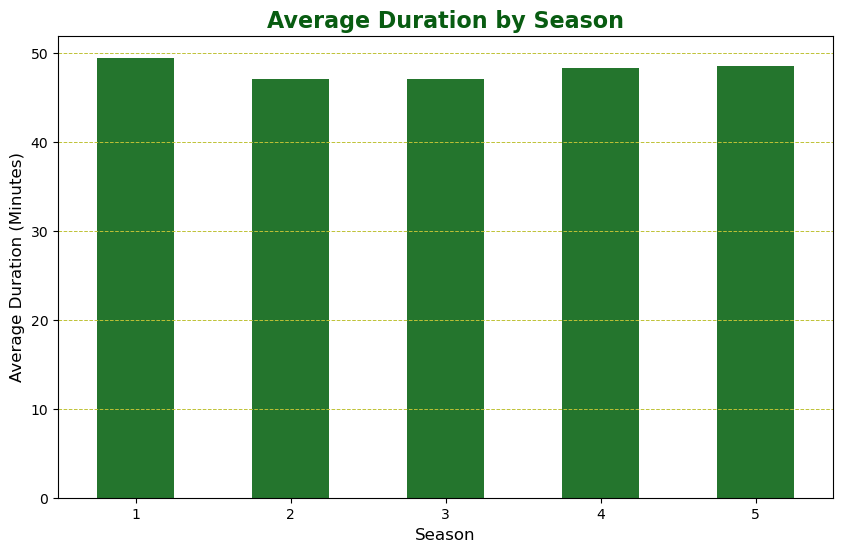


Overall Mean IMDb Rating for Breaking Bad: 9.02


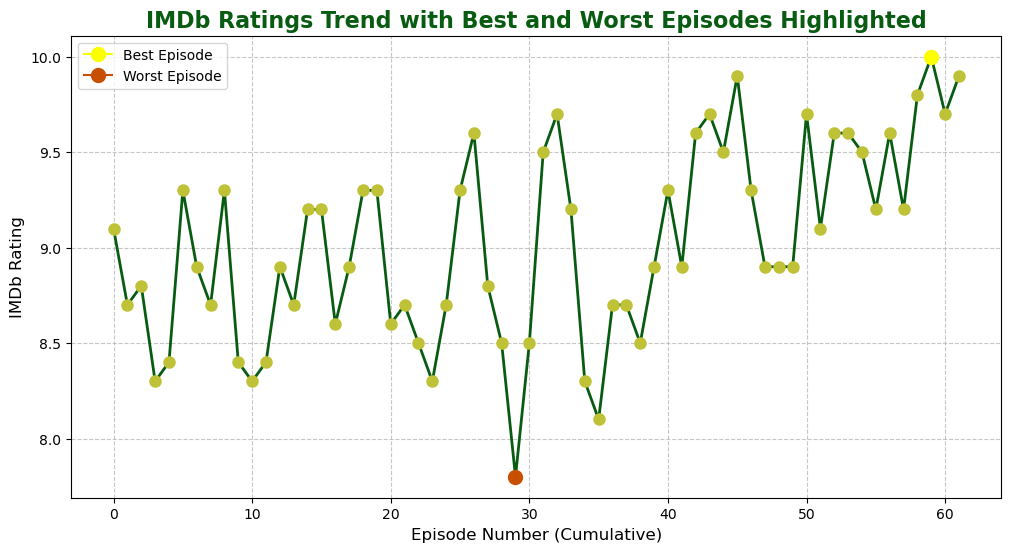

--------------------------------------------------
Best Rating Episode of all series 
--------------------------------------------------
Title: 'Ozymandias'
Season 5 Episode 14
IMDB Rating 10.0
Directed by Rian Johnson
Summary: Walt goes on the run. Jesse is taken hostage. Marie convinces Skyler to tell Walter, Jr. the truth.
------------------------------------------------------------------------------------------------------------------------------
Worst Rating Episode of all series
--------------------------------------------------
Title: 'Fly'
Season 3 Episode 10
IMDB Rating 7.8
Directed by Rian Johnson
Summary: There is a fly loose in the lab. Walt and Jesse must do whatever they can to kill it before it contaminates the meth.
------------------------------------------------------------------------------------------------------------------------------


In [225]:
number_of_episodes=len(df)
distinct_seasons = df['Season'].unique()
number_of_seasons=len(distinct_seasons)

first_air_date = df['Date'].iloc[0]
last_air_date = df['Date'].iloc[61]

best_episode = df.loc[df['Rating_IMDB'].idxmax()]
worst_episode = df.loc[df['Rating_IMDB'].idxmin()]

    
def best_and_worst_chart():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Rating_IMDB'], marker='o', linestyle='-', color='#085c11',
             markersize=8, linewidth=2, markerfacecolor='#bfc236', markeredgecolor='#bfc236')
    
    plt.plot(best_episode.name, best_episode['Rating_IMDB'], marker='o', markersize=10, color='#fbff00', label="Best Episode")
    plt.plot(worst_episode.name, worst_episode['Rating_IMDB'], marker='o', markersize=10, color='#c75000', label="Worst Episode")
    
    plt.title('IMDb Ratings Trend with Best and Worst Episodes Highlighted', fontsize=16, fontweight='bold', color='#085c11')
    plt.xlabel('Episode Number (Cumulative)', fontsize=12)
    plt.ylabel('IMDb Rating', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def best_and_worst():
    print("-" * 50)
    print(f"Best Rating Episode of all series ")
    print("-" * 50)

    print(f"Title: '{best_episode['Title']}'")
    print(f"Season {best_episode['Season']} Episode {best_episode['Episode']}")
    print(f"IMDB Rating {best_episode['Rating_IMDB']:.1f}")
    print(f"Directed by {best_episode['Directed by']}")

    print(f"Summary: {best_episode['Summary']}")
    print("-" * 126)
    
    print(f"Worst Rating Episode of all series")
    print("-" * 50)

    print(f"Title: '{worst_episode['Title']}'")
    print(f"Season {worst_episode['Season']} Episode {worst_episode['Episode']}")
    print(f"IMDB Rating {worst_episode['Rating_IMDB']:.1f}")
    print(f"Directed by {worst_episode['Directed by']}")

    print(f"Summary: {worst_episode['Summary']}")
    
    print("-" * 126)




def overall_analysis():
    print("=" * 50)
    print(f"{f'Breaking Bad Overall analysis':^50}")
    print("=" * 50)

    print(f"The First episode aired on - {first_air_date}")
    print(f"The Last episode aired on - {last_air_date}")
    print(f"Number of Seasons - {number_of_seasons}")
    print(f"Number of Episodes - {number_of_episodes}")
    minutes_chart()

    overall_mean_rating = df['Rating_IMDB'].mean()
    print(f"\nOverall Mean IMDb Rating for Breaking Bad: {overall_mean_rating:.2f}")
    best_and_worst_chart()
    best_and_worst()

def minutes_chart():
    avg_duration_by_season = df.groupby('Season')['Duration_mins'].mean()
    print(f"\nAverage Duration by Season:\n{avg_duration_by_season}")

    plt.figure(figsize=(10, 6))
    avg_duration_by_season.plot(kind='bar', color='#24752d')
    plt.title('Average Duration by Season', fontsize=16,fontweight='bold',color='#085c11')
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Average Duration (Minutes)', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y',linestyle='--', linewidth=0.7, color='#bfc236')
    plt.show()
overall_analysis()

## Functions for Breaking Bad Season Analysis
*Detailed functions to analyze each season individually, providing insights and visualizations for a deeper understanding of the show's ratings.*

In [226]:
def analyze_season(season_num):
    number_of_episodes=len(season_num)
    season=season_num['Season'].iloc[0]
    best_episode = season_num.loc[season_num['Rating_IMDB'].idxmax()]
    worst_episode = season_num.loc[season_num['Rating_IMDB'].idxmin()]
    
    # Print with formatting
    print("=" * 50)
    print(f"{f'Breaking Bad Season {season} Analysis':^50}")
    print("=" * 50)
    print(f"Number of episodes: {number_of_episodes}")
    print("-" * 50)
    
    print(f"Best Rating Episode")
    print(f"Title: '{best_episode['Title']}'")
    print(f"Episode {best_episode['Episode']} with Rating of {best_episode['Rating_IMDB']:.1f}")
    print(f"Summary: {best_episode['Summary']}")
    print("-" * 50)
    
    print(f"Worst Rating Episode")
    print(f"Title: '{worst_episode['Title']}'")
    print(f"Episode {worst_episode['Episode']} with Rating of {worst_episode['Rating_IMDB']:.1f}")
    print(f"Summary: {worst_episode['Summary']}")

def show_chart(season_num):
    line_color="#085c11"
    marker_color="#bfc236"
    season=season_num['Season'].iloc[0]

    
    # Create a line plot
    plt.figure(figsize=(10, 5))
    plt.plot(season_num['Episode'], season_num['Rating_IMDB'],
             marker='o', linestyle='-', color=line_color,
             markersize=8, linewidth=2, markerfacecolor=marker_color,
            markeredgecolor= marker_color)
    plt.title(f'IMDb Ratings for Each Episode of Breaking Bad Season {season}',
             fontsize=15, fontweight='bold', color=line_color)
    plt.xlabel('Episode Number', fontsize=12)
    plt.ylabel('IMDb Rating', fontsize=12)
    plt.xticks(season_num['Episode'])
    plt.grid(color="#dcde78", linestyle='--', linewidth=1)
    plt.gca()
    plt.show()

def rating_mean(season_num):
    season=season_num['Season'].iloc[0]
    mean_1 = season_num['Rating_IMDB'].mean()
    print(f"The mean of the IMDb ratings for season {season} of Breaking Bad is {mean_1:.2f}")

## Season 1 of Breaking Bad

          Breaking Bad Season 1 Analysis          
Number of episodes: 7
--------------------------------------------------
Best Rating Episode
Title: 'Crazy Handful of Nothin''
Episode 6 with Rating of 9.3
Summary: With the side effects and cost of his treatment mounting, Walt demands that Jesse finds a wholesaler to buy their drugs - which lands him in trouble.
--------------------------------------------------
Worst Rating Episode
Title: 'Cancer Man'
Episode 4 with Rating of 8.3
Summary: Walt tells the rest of his family about his cancer. Jesse tries to make amends with his own parents.


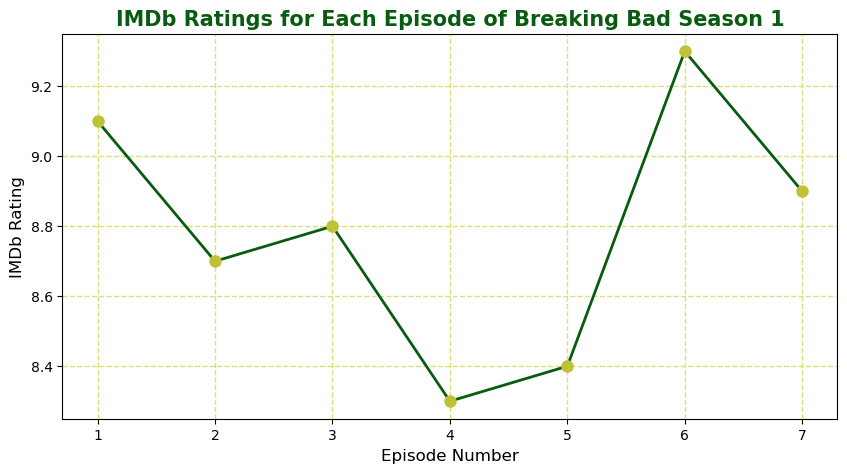

The mean of the IMDb ratings for season 1 of Breaking Bad is 8.79


In [227]:
season=df[df['Season']==1]
analyze_season(season)
show_chart(season)
rating_mean(season)

## Season 2 of Breaking Bad

          Breaking Bad Season 2 Analysis          
Number of episodes: 13
--------------------------------------------------
Best Rating Episode
Title: 'Grilled'
Episode 2 with Rating of 9.3
Summary: Walt's disappearance is met with investigation by both his wife and Hank, as Tuco Salamanca intends to leave town with his kidnapped cooks.
--------------------------------------------------
Worst Rating Episode
Title: 'Down'
Episode 4 with Rating of 8.3
Summary: Skyler keeps mysteriously leaving without talking to Walt. Jesse's parents throw him out of his own house.


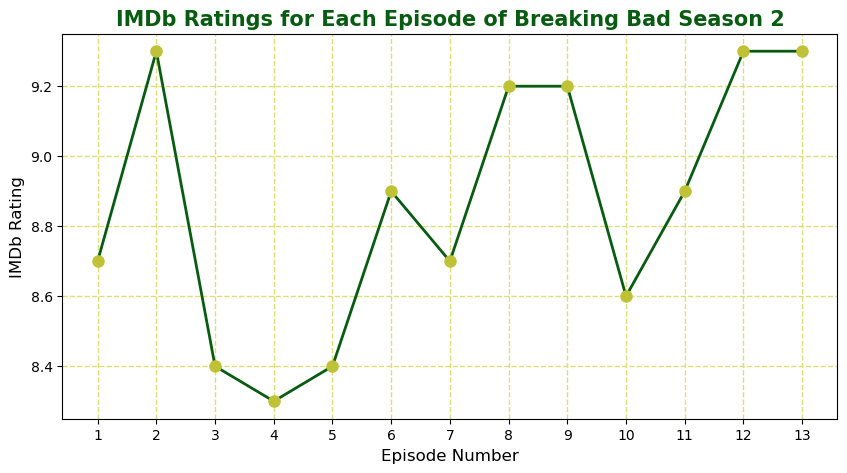

The mean of the IMDb ratings for season 2 of Breaking Bad is 8.86


In [228]:
season=df[df['Season']==2]
analyze_season(season)
show_chart(season)
rating_mean(season)

## Season 3 of Breaking Bad


          Breaking Bad Season 3 Analysis          
Number of episodes: 13
--------------------------------------------------
Best Rating Episode
Title: 'Full Measure'
Episode 13 with Rating of 9.7
Summary: Jesse has disappeared and Walt is in big trouble with Gus. So Gus rehires Gale to learn from Walt's cooking so that they can dispose of Walt once and for all.
--------------------------------------------------
Worst Rating Episode
Title: 'Fly'
Episode 10 with Rating of 7.8
Summary: There is a fly loose in the lab. Walt and Jesse must do whatever they can to kill it before it contaminates the meth.


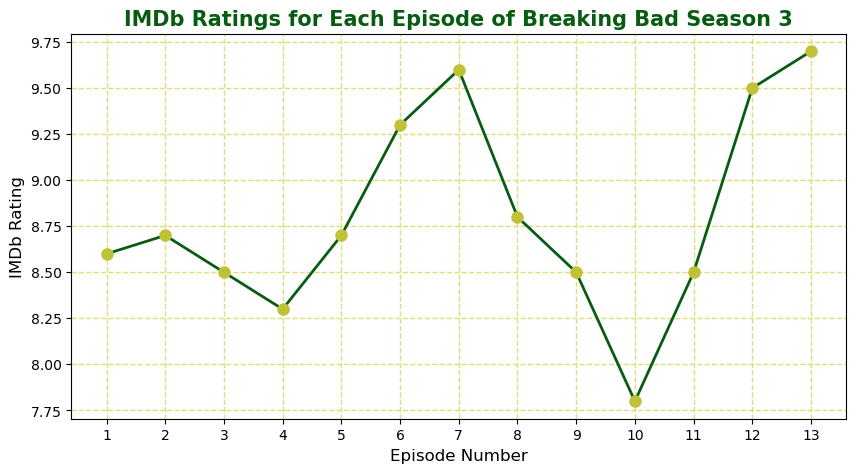

The mean of the IMDb ratings for season 3 of Breaking Bad is 8.81


In [229]:
season=df[df['Season']==3]
analyze_season(season)
show_chart(season)
rating_mean(season)

## Season 4 of Breaking Bad

          Breaking Bad Season 4 Analysis          
Number of episodes: 13
--------------------------------------------------
Best Rating Episode
Title: 'Face Off'
Episode 13 with Rating of 9.9
Summary: Jesse is brought to the FBI for questioning on his knowledge of ricin. In a last effort to kill Gus, Walt must ask for help from an old enemy.
--------------------------------------------------
Worst Rating Episode
Title: 'Open House'
Episode 3 with Rating of 8.1
Summary: While Walt worries about Gus's interference and Jesse's increasingly fragile state of mind, Skyler steps up the pressure to get what she wants.


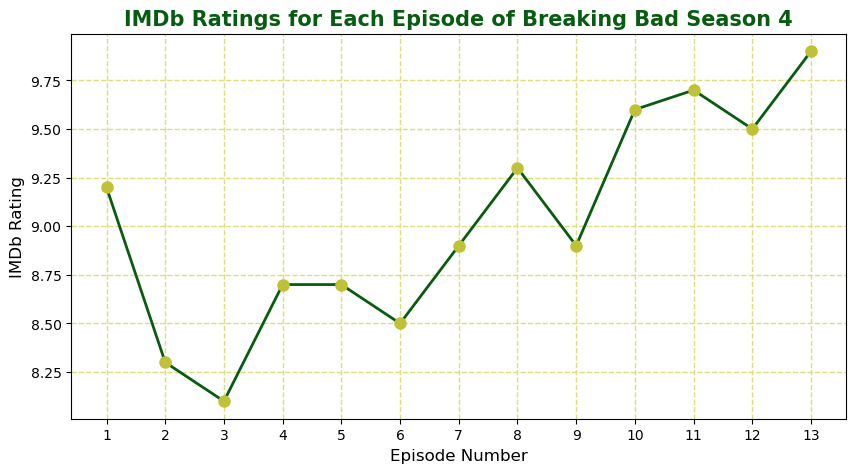

The mean of the IMDb ratings for season 4 of Breaking Bad is 9.02


In [230]:
season=df[df['Season']==4]
analyze_season(season)
show_chart(season)
rating_mean(season)

## Season 5 of Breaking Bad

          Breaking Bad Season 5 Analysis          
Number of episodes: 16
--------------------------------------------------
Best Rating Episode
Title: 'Ozymandias'
Episode 14 with Rating of 10.0
Summary: Walt goes on the run. Jesse is taken hostage. Marie convinces Skyler to tell Walter, Jr. the truth.
--------------------------------------------------
Worst Rating Episode
Title: 'Madrigal'
Episode 2 with Rating of 8.9
Summary: Walt and Jesse seek out an unlikely partner for a new business venture. The DEA follows up new leads in its investigation.


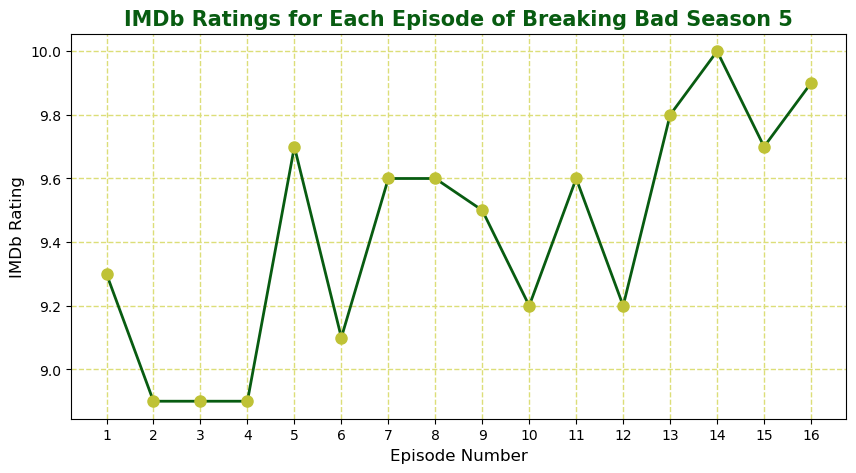

The mean of the IMDb ratings for season 5 of Breaking Bad is 9.43


In [231]:
season=df[df['Season']==5]
analyze_season(season)
show_chart(season)
rating_mean(season)